## Czym jest Topic Modeling?

**Topic Modeling** to technika eksploracji tekstu w celu automatycznego odkrywania ukrytych tematów (ang. *topics*) w dużych zbiorach dokumentów. Zamiast oznaczać teksty ręcznie, model sam:

1. Analizuje współwystępowanie słów w dokumentach.  
2. Grupuje słowa występujące razem w spójne zestawy, które traktujemy jako „tematy” (np. zestaw słów „rakieta, orbita, NASA” może tworzyć temat „kosmos”).  
3. Dla każdego dokumentu określa, w jakim stopniu odnosi się on do każdego z tematów.

Dzięki temu można:
- Podsumować główne wątki w korpusie tekstów bez nadzoru człowieka.  
- Wyszukiwać dokumenty o podobnej zawartości tematycznej.  
- Wizualizować ewolucję tematów w czasie.  

---

## Czym jest Text Classification?

**Text Classification** (klasyfikacja tekstu) to proces przypisywania etykiet (kategorí) do dokumentów na podstawie ich treści. Zazwyczaj wymaga:
1. **Zbioru treningowego** z ręcznie oznaczonymi przykładami (np. dokumenty już sklasyfikowane jako „sport”, „polityka”, „kultura”).  
2. **Modelu nadzorowanego** uczącego się związku pomiędzy cechami tekstu (np. częstość słów) a kategoriami.  
3. **Predykcji** – po wytrenowaniu model potrafi automatycznie przypisać nowy dokument do jednej (lub więcej) ustalonych klas.

Przykłady zastosowań:
- Filtry antyspamowe (spam vs. nie–spam).  
- Analiza sentymentu (pozytywny vs. negatywny).  
- Automatyczne oznaczanie tematów w wiadomościach.

---

## Główne różnice

| Aspekt                      | Topic Modeling                             | Text Classification                          |
|-----------------------------|---------------------------------------------|-----------------------------------------------|
| **Nadzór**                  | Bez nadzoru (unsupervised)                  | Nadzorowany (supervised)                      |
| **Etykiety**                | Brak gotowych etykiet – model sam je odkrywa| Etykiety znane z góry i wymagana etykietacja  |
| **Cel**                     | Odkrywanie ukrytych tematów                 | Przypisanie dokumentu do jednej/kilku klas    |
| **Zbiór treningowy**        | Wystarczy surowy korpus tekstów             | Wymaga oznaczonych przykładów                 |
| **Elastyczność**            | Adaptuje się do dowolnego korpusu           | Ograniczona do zdefiniowanych klas            |
| **Interpretacja wyników**   | Tematy są mieszanką słów, potrzebują interpretacji | Wynik to konkretna etykieta                   |
| **Zastosowania**            | Eksploracja, analiza trendów, segmentacja   | Filtry, automatyczne decyzje, raportowanie   |

---

### Podsumowanie

- **Topic Modeling** to narzędzie do **eksploracji** i **odkrywania** struktury tematycznej dużych zbiorów tekstów bez wcześniejszego oznaczania danych.  
- **Text Classification** to technika do **automatycznego etykietowania** nowych dokumentów na podstawie wcześniej przygotowanego, oznaczonego zbioru treningowego.  

Obie metody są kluczowe w NLP, ale służą różnym celom: Topic Modeling pomaga zrozumieć, **o czym** są dokumenty, a klasyfikacja – **jak** zaklasyfikować je według znanych kategorii.  


- [Topic Modeling](https://www.datacamp.com/tutorial/what-is-topic-modeling)
- [Topic Modeling by IBM](https://www.ibm.com/think/topics/topic-modeling)
- [LDA,LSA itd](https://medium.com/@m.nath/topic-modeling-algorithms-b7f97cec6005)
- [Topic Modeling metody](https://cognitivemachine.medium.com/topic-modelling-techniques-f1ce0d0c3262)

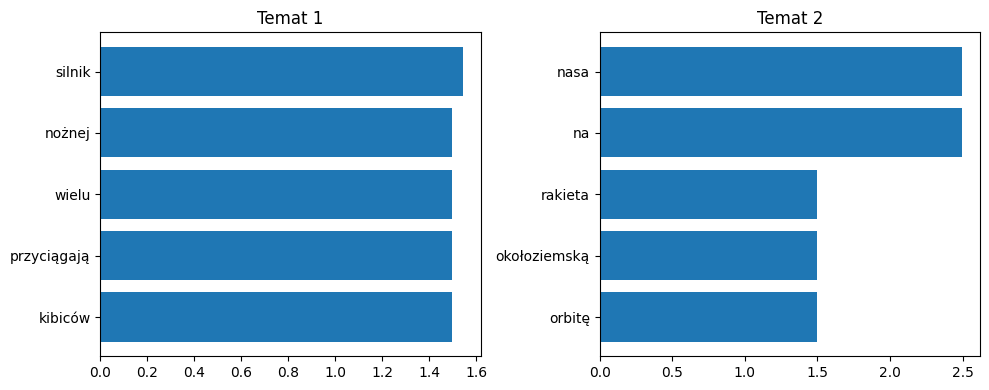

In [10]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 1. Przygotowanie przykładowych dokumentów
documents = [
    "Rakieta NASA leci na orbitę okołoziemską",
    "Silnik samochodowy generuje moc i moment obrotowy",
    "NASA planuje nową misję na Marsa",
    "Kierowca testuje silnik w warsztacie samochodowym",
    "Zespół piłkarski zdobywa bramkę w ostatniej minucie",
    "Mecze piłki nożnej przyciągają wielu kibiców"
]

# 2. Wektoryzacja: macierz dokument-słowo (bag-of-words)
vectorizer = CountVectorizer()
dt_matrix = vectorizer.fit_transform(documents)

# 3. Trenowanie modelu LDA na 2 tematach
lda = LatentDirichletAllocation(n_components=2, random_state=0)
lda.fit(dt_matrix)

# 4. Wyciągnięcie top 5 słów i ich wag dla każdego tematu
n_top = 5
feature_names = vectorizer.get_feature_names_out()
topics = []
for idx, comp in enumerate(lda.components_):
    top_indices = comp.argsort()[:-n_top - 1:-1]      # indeksy 5 najwyższych wag
    words = [feature_names[i] for i in top_indices]  # słowa dla tych indeksów
    weights = comp[top_indices]                      # odpowiadające wagi
    topics.append((idx, words, weights))

# 5. Wizualizacja: słupki pokazujące wagi top-słów dla każdego tematu
fig, axes = plt.subplots(1, len(topics), figsize=(10, 4))
for ax, (topic_idx, words, weights) in zip(axes, topics):
    ax.barh(words, weights)                          # wykres poziomy
    ax.set_title(f"Temat {topic_idx + 1}")           # tytuł wykresu
    ax.invert_yaxis()                                # najwyższe na górze
plt.tight_layout()
plt.show()


In [ ]:
!pip install gensim

In [9]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation   # LDA
from gensim.models import Word2Vec                            # Word2Vec z gensim
from gensim.utils import simple_preprocess

# 2. Wczytujemy podzbiór Train z wybranych kategorii
categories = ['sci.space', 'rec.autos', 'comp.graphics']
newsgroups = fetch_20newsgroups(
    subset='train',
    categories=categories,          # interesujące nas kategorie
    remove=('headers','footers','quotes')  # usuwamy nagłówki, stopki, cytaty
)
documents = newsgroups.data[:200]    # bierzemy pierwsze 200 dokumentów bo zasowby

# 3. TF-IDF + LDA
tfidf = TfidfVectorizer(
    max_df=0.8,
    min_df=5,
    stop_words='english'             # angielskie stop-words
)
tfidf_matrix = tfidf.fit_transform(documents)  # uczymy i przekształcamy teksty
lda = LatentDirichletAllocation(
    n_components=3,                  # szukamy 3 tematów
    max_iter=10,
    random_state=0
)
lda.fit(tfidf_matrix)               # trenujemy model

# 4. Wyświetlamy top-5 słów dla każdego tematu
n_top = 5
feature_names = tfidf.get_feature_names_out()
for idx, comp in enumerate(lda.components_):
    top_indices = comp.argsort()[:-n_top-1:-1]
    top_words = [feature_names[i] for i in top_indices]
    print(f"Temat {idx+1}: {', '.join(top_words)}")

# 5. Przygotowanie dokumentów dla Word2Vec
tokenized = [simple_preprocess(doc) for doc in documents]
# simple_preprocess: lowercase, usunięcie nieliterowych, tokenizacja

# 6. Trenowanie Word2Vec
w2v = Word2Vec(
    sentences=tokenized,   # nasze tokenizowane dokumenty
    vector_size=100,       # wymiar wektorów
    window=5,              # okno kontekstowe ±5 słów
    min_count=3,           # ignoruj słowa poniżej 3 wystąpień
    workers=4,
    epochs=50
)

# 7. Przykładowe użycie: podobieństwo słów
query = 'space'
if query in w2v.wv:
    print(f"\nVektor {query}[:5]:", w2v.wv[query][:5])
    print("3 najbardziej podobne słowa:", w2v.wv.most_similar(query, topn=3))
else:
    print(f"Słowo '{query}' nie znalazło się w modelu.")


Temat 1: know, thanks, car, claim, windows
Temat 2: space, car, just, nasa, like
Temat 3: library, stuff, driver, file, quite

Vektor space[:5]: [ 1.7716862   2.5895255  -0.58377486  0.29579803 -0.739732  ]
3 najbardziej podobne słowa: [('johnson', 0.7220004796981812), ('agency', 0.7011113166809082), ('shuttle', 0.6910684108734131)]


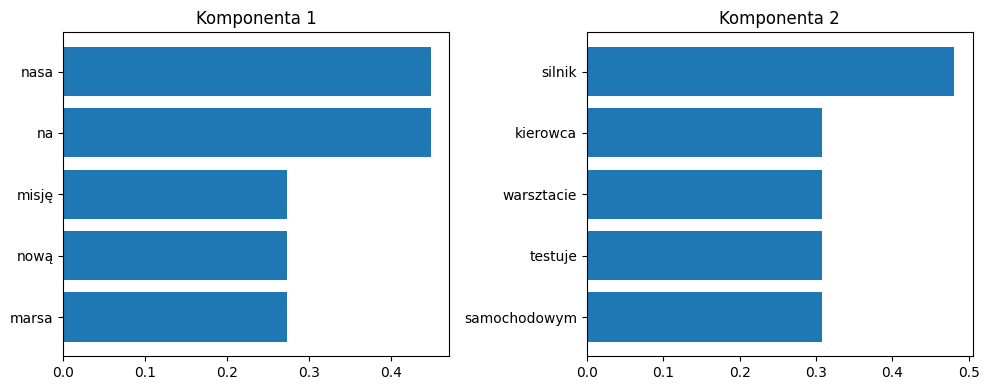

In [11]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# 1. Przykładowe dokumenty
documents = [
    "Rakieta NASA leci na orbitę okołoziemską",
    "Silnik samochodowy generuje moc i moment obrotowy",
    "NASA planuje nową misję na Marsa",
    "Kierowca testuje silnik w warsztacie samochodowym",
    "Zespół piłkarski zdobywa bramkę w ostatniej minucie",
    "Mecze piłki nożnej przyciągają wielu kibiców"
]

# 2. TF-IDF wektoryzacja dokumentów
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# 3. LSA przez SVD: redukcja do 2 komponentów
svd = TruncatedSVD(n_components=2, random_state=0)
svd.fit(tfidf_matrix)

# 4. Wyciągamy top 5 słów dla każdej komponenty
n_top = 5
feature_names = vectorizer.get_feature_names_out()
components = []
for idx, comp in enumerate(svd.components_):
    top_indices = comp.argsort()[:-n_top-1:-1]
    words = [feature_names[i] for i in top_indices]
    weights = comp[top_indices]
    components.append((idx, words, weights))

# 5. Wizualizacja: wykres słupkowy top słów dla każdej komponenty
fig, axes = plt.subplots(1, len(components), figsize=(10, 4))
for ax, (comp_idx, words, weights) in zip(axes, components):
    ax.barh(words, weights)
    ax.set_title(f"Komponenta {comp_idx + 1}")
    ax.invert_yaxis()
plt.tight_layout()
plt.show()


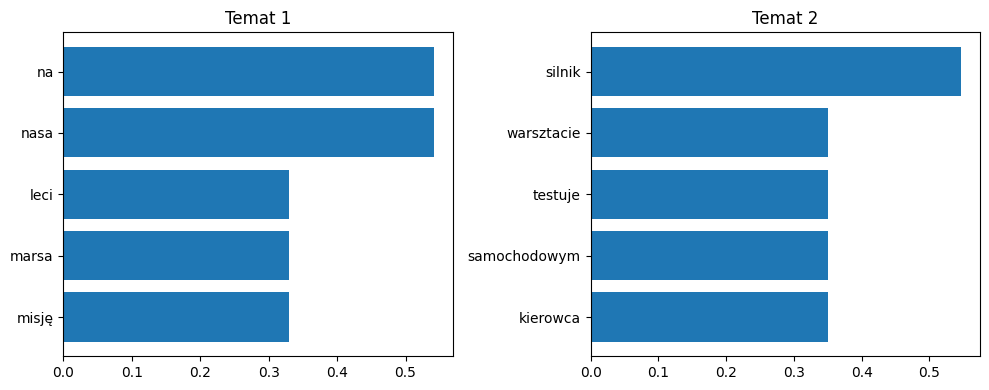

In [12]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 1. Przykładowe dokumenty
documents = [
    "Rakieta NASA leci na orbitę okołoziemską",
    "Silnik samochodowy generuje moc i moment obrotowy",
    "NASA planuje nową misję na Marsa",
    "Kierowca testuje silnik w warsztacie samochodowym",
    "Zespół piłkarski zdobywa bramkę w ostatniej minucie",
    "Mecze piłki nożnej przyciągają wielu kibiców"
]

# 2. TF-IDF wektoryzacja dokumentów
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# 3. NMF: redukcja do 2 tematów
nmf = NMF(n_components=2, random_state=0, init='nndsvda', max_iter=200)
W = nmf.fit_transform(tfidf_matrix)  # macierz dokument-temat
H = nmf.components_                  # macierz temat-słowo

# 4. Wyciągamy top 5 słów dla każdego tematu
n_top = 5
feature_names = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic_weights in enumerate(H):
    top_indices = topic_weights.argsort()[:-n_top-1:-1]
    words = [feature_names[i] for i in top_indices]
    weights = topic_weights[top_indices]
    topics.append((topic_idx, words, weights))

# 5. Wizualizacja: wykres słupkowy top słów dla każdego tematu
fig, axes = plt.subplots(1, len(topics), figsize=(10, 4))
for ax, (topic_idx, words, weights) in zip(axes, topics):
    ax.barh(words, weights)
    ax.set_title(f"Temat {topic_idx + 1}")
    ax.invert_yaxis()
plt.tight_layout()
plt.show()


In [13]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

## Różnice między metodami Topic Modeling

Poniżej porównanie czterech popularnych technik wydobywania tematów: **LSA**, **LDA**, **NMF** i **BERTopic**.

| Cecha / Metoda        | LSA (SVD)                                  | LDA (Dirichlet)                             | NMF (Non-negative MF)                       | BERTopic                                  |
|-----------------------|--------------------------------------------|----------------------------------------------|---------------------------------------------|-------------------------------------------|
| **Typ modelu**        | Algebraiczna dekompozycja macierzy         | Probabilistyczny model generatywny           | Algebraiczny, z ograniczeniem nieujemności  | Hybrydowy: embeddings + clustering + UMAP |
| **Wejście**           | Macierz TF–IDF                             | Bag-of-words lub TF–IDF                      | Macierz TF–IDF                              | Dokumenty + embeddingi (np. BERT)         |
| **Wyjście**           | Latentne składniki (komponenty)            | Rozkład tematów dla dokumentu                | Rozkład tematów dla dokumentu               | Tematy jako zbiory embeddingów            |
| **Interpretowalność** | Średnia – składowe mogą być trudne do nazwania | Wysoka – tematy to rozkłady słów            | Wysoka – tematy zdefiniowane dodatkowymi wagami | Bardzo wysoka – automatyczne etykiety i wizualizacje |
| **Parametry kluczowe**| liczba komponentów \(k\)                    | liczba tematów, α, β                          | liczba tematów \(k\), inicjalizacja, iteracje | model embeddingów, minimalna wielkość klastra, UMAP |
| **Skalowalność**      | Bardzo szybka (SVD)                        | Umiarkowana – wymaga iteracji VB/Gibbs       | Szybka (algorytmy gradientowe)              | Wolniejsza (embedding + redukcja wymiaru) |
| **Obsługa semantyki**  | Ograniczona – bazuje na globalnej statystyce | Lepiej – model zakłada mieszanki tematów     | Podobnie do LDA, ale bez niepewności        | Najlepsza – korzysta z kontekstowych embeddingów |
| **Niepewność**        | Brak estymacji niepewności                 | Model probabilistyczny – zwraca niepewność   | Brak formalnej niepewności                  | Możliwość oceny jakości klastrów (probs) |
| **Strojenie**         | Proste – głównie liczba komponentów        | Średnie – α, β, liczba tematów               | Proste – głównie liczba tematów             | Więcej hiperparametrów (embeddingi, redukcja, clustering) |
| **Wizualizacje**      | Zewnętrzne (np. wykresy słów, scatter plot) | Zewnętrzne + narzędzia (pyLDAvis)           | Zewnętrzne (jak w LSA)                      | Wbudowane (bary, UMAP, hierarchie tematów) |
| **Kiedy używać?**     | Prototypy, szybkie analizy                  | Gdy potrzebujemy interpretowalnych tematów   | Gdy chcemy tematy z dodatkowymi ograniczeniami | Gdy potrzebujemy kontekstowych tematów i interakcji |

---

### Krótkie podsumowanie

- **LSA**: prosta i szybka metoda redukcji wymiaru, dobre na małe i średnie korpusy, ale bez modelowania niepewności i kontekstu.  
- **LDA**: klasyczny probabilistyczny model, zwraca mieszanki tematów i pozwala modelować niepewność, wymaga strojenia hiperparametrów.  
- **NMF**: alternatywa algebraiczna do LDA, wymusza nieujemność wag, łatwa do zrozumienia i interpretacji, szybka w działaniu.  
- **BERTopic**: nowoczesna metoda łącząca moc pretrenowanych embeddingów (np. BERT), redukcję wymiaru (UMAP) i klastrowanie, oferuje automatyczne etykiety i wizualizacje, ale wymaga więcej zasobów i strojenia.  

Wybór metody zależy od charakteru danych, wymagań dotyczących interpretowalności, dostępnych zasobów obliczeniowych oraz tego, czy zależy nam na kontekstowych embeddingach i wbudowanych wizualizacjach.  


## Zadanie

- Wybrać dowolny zbiór danych i przetestować wspomniane metody LSA, LDA, NMF oraz BERTopic(bazująć na [link](https://maartengr.github.io/BERTopic/getting_started/quickstart/quickstart.html#quick-start)